# Deep Learning for Image Classification Assessment

The task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## The Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout

from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report, confusion_matrix



from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print('Trainng data dimension:\nFeature: {}, Target: {}'.format(x_train.shape,y_train.shape))
print('\nTesting data dimension:\nFeature: {}, Target: {}'.format(x_test.shape,y_test.shape))

Trainng data dimension:
Feature: (60000, 28, 28), Target: (60000,)

Testing data dimension:
Feature: (10000, 28, 28), Target: (10000,)


In [2]:
x_train, x_test = x_train/255, x_test/255

In [3]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [4]:
nClass = len(set(y_train))
print('Total  number of classes for classification: {}'.format(nClass))
fashionMNIST_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
                       'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

fashionMNIST_dict = dict(zip(range(nClass), fashionMNIST_labels))

Total  number of classes for classification: 10


In [5]:
fashionMNIST_dict

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

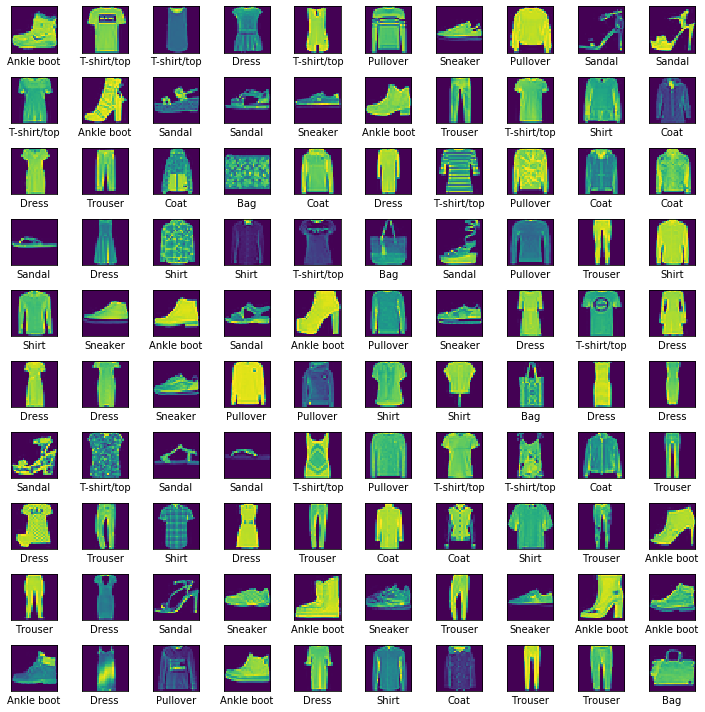

In [6]:
# cmap=plt.cm.binary
plt.figure(figsize=(10,10))
for i in range(100):
    plt.subplot(10, 10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.squeeze(x_train)[i])
    plt.xlabel(fashionMNIST_dict[y_train[i]])
plt.tight_layout()
plt.show()

In [7]:
x_train, x_test = x_train[:,:,:,np.newaxis], x_test[:,:,:,np.newaxis]

y_train_encode = to_categorical(y_train)
y_test_encode = to_categorical(y_test)

In [8]:
input_image_shape = x_train[1,:].shape

## Building the Model

In [69]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=input_image_shape, activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

# model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=input_image_shape, activation='relu',))
# model.add(MaxPool2D(pool_size=(2, 2)))

# model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=input_image_shape, activation='relu',))
# model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5)

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               1384576   
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1290      
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
_________________________________________________________________


In [70]:
model.fit(x_train,y_train_encode,epochs=50,validation_data=(x_test,y_test_encode),callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 110s 2ms/sample - loss: 0.3751 - accuracy: 0.8680 - val_loss: 0.3283 - val_accuracy: 0.8822
Epoch 2/50
60000/60000 [==============================] - 118s 2ms/sample - loss: 0.2576 - accuracy: 0.9075 - val_loss: 0.2721 - val_accuracy: 0.9018
Epoch 3/50
60000/60000 [==============================] - 109s 2ms/sample - loss: 0.2198 - accuracy: 0.9210 - val_loss: 0.2650 - val_accuracy: 0.9058
Epoch 4/50
60000/60000 [==============================] - 112s 2ms/sample - loss: 0.1948 - accuracy: 0.9306 - val_loss: 0.2691 - val_accuracy: 0.9062
Epoch 5/50
60000/60000 [==============================] - 113s 2ms/sample - loss: 0.1774 - accuracy: 0.9378 - val_loss: 0.2827 - val_accuracy: 0.9099
Epoch 6/50
60000/60000 [==============================] - 115s 2ms/sample - loss: 0.1624 - accuracy: 0.9431 - val_loss: 0.3304 - val_accuracy: 0.9012
Epoch 7/50
60000/60000 [==========================

In [71]:
metric = pd.DataFrame(model.history.history)

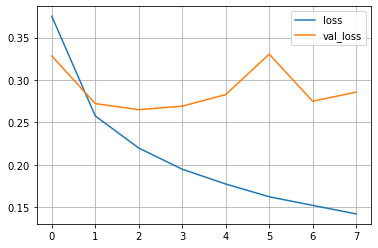

In [72]:
metric[['loss', 'val_loss']].plot(grid=True)

In [73]:
predictions = model.predict_classes(x_test)

In [74]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1000
           1       0.99      0.97      0.98      1000
           2       0.88      0.85      0.87      1000
           3       0.89      0.93      0.91      1000
           4       0.88      0.87      0.87      1000
           5       0.98      0.97      0.98      1000
           6       0.80      0.74      0.77      1000
           7       0.95      0.98      0.97      1000
           8       0.97      0.99      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.91      0.92      0.91     10000
weighted avg       0.91      0.92      0.91     10000



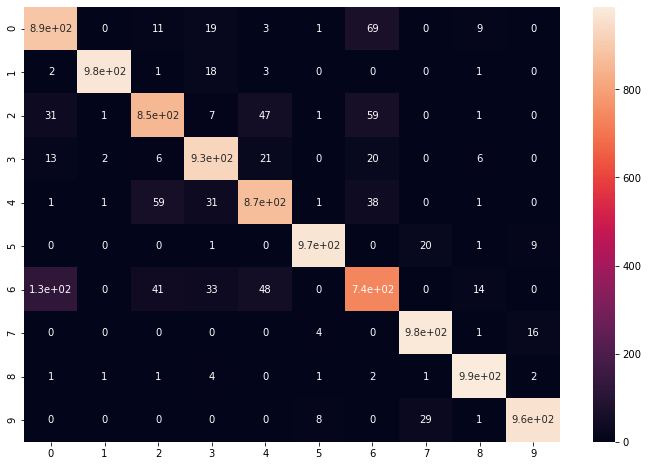

In [75]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

There are in total 850 misclassified digits. Some of them are,


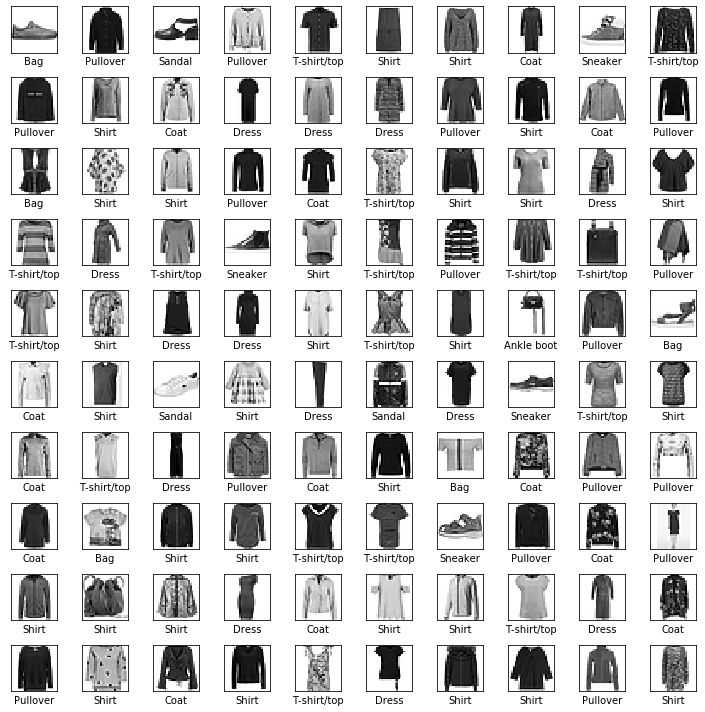

In [76]:
_ = list(predictions==y_test.flatten())
wrong_index = [i for i, __ in enumerate(_) if not __]
print('There are in total {} misclassified digits. Some of them are,'.format(len(wrong_index)))
plt.figure(figsize=(10,10))
for count, i in enumerate(wrong_index[0:100]):
    plt.subplot(10, 10, count+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.squeeze(x_test)[i], cmap=plt.cm.binary)
    plt.xlabel(fashionMNIST_dict[predictions[i]])
plt.tight_layout()
plt.show()